In [5]:
import ndjson 
with open('data/full_raw_The Eiffel Tower.ndjson') as f:
    data = ndjson.load(f)


In [28]:
# { 
#     "key_id":"5891796615823360",
#     "word":"nose",
#     "countrycode":"AE",
#     "timestamp":"2017-03-01 20:41:36.70725 UTC",
#     "recognized":true,
#     "drawing":[[[129,128,129,129,130,130,131,132,132,133,133,133,133,...]]]
#   }
import numpy as np
import pickle
justDrawings = []
normfac = 256
for i, d in enumerate(data):
    justDrawings.append(d['drawing'])
    strokes = []
    for stroke in d['drawing']:
        stroke = np.array(stroke).T.astype(np.float32)
        stroke[:, 0] /= normfac
        stroke[:, 1] /= normfac
        strokes.append(stroke)
    pickle.dump(strokes, open('data/processed/eiffeltower.pkl', 'wb'))
    # np.save('data/processed/eiffeltower.npy', strokes)
    # break
    if i == 2:
        break


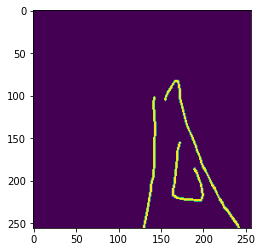

In [27]:
# justDrawings[0]

import numpy as np
import cv2
import matplotlib.pyplot as plt
strokes = []
img = np.zeros((256, 256), dtype = np.uint8)
index = 1
for stroke in justDrawings[index]:
    # print(stroke[0])
    stroke = np.array(stroke)
    # print(stroke.shape)
    for i in range(stroke.shape[1] - 1):
        cv2.line(img, (int(stroke[0][i]), int(stroke[1][i])), (int(stroke[0][i+1]), int(stroke[1][i+1])), (255, 255, 255), 2)
plt.imshow(img)
plt.show()

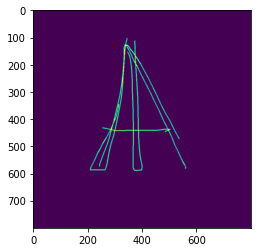